In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import os


In [59]:
# CSV-Datei laden: Anpassen mit deinem Pfad
csv_path = 'c:\Arbeitsplatz\Studium_Innsbruck\MGST_23_Bewegungsanalyse\Doppelstock_Langlauf/Data/Data_tests/2025-04-08-18-13_IMU_FB_1DV(1).csv'  # z. B. 'IMU_FB_1DV.csv'


# Überprüfen, ob der Pfad zur Datei existiert
print(os.path.exists(csv_path))

print(os.getcwd())

# Die eigentlichen Datenzeilen beginnen ab Zeile 3 (Index 2), daher skiprows=2
df = pd.read_csv(csv_path, skiprows=3, sep=';', decimal=',')

True
c:\Arbeitsplatz\Studium_Innsbruck\MGST_23_Bewegungsanalyse\Doppelstock_Langlauf


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_28532\1583208323.py:2: SyntaxWarning: invalid escape sequence '\A'
  csv_path = 'c:\Arbeitsplatz\Studium_Innsbruck\MGST_23_Bewegungsanalyse\Doppelstock_Langlauf/Data/Data_tests/2025-04-08-18-13_IMU_FB_1DV(1).csv'  # z. B. 'IMU_FB_1DV.csv'


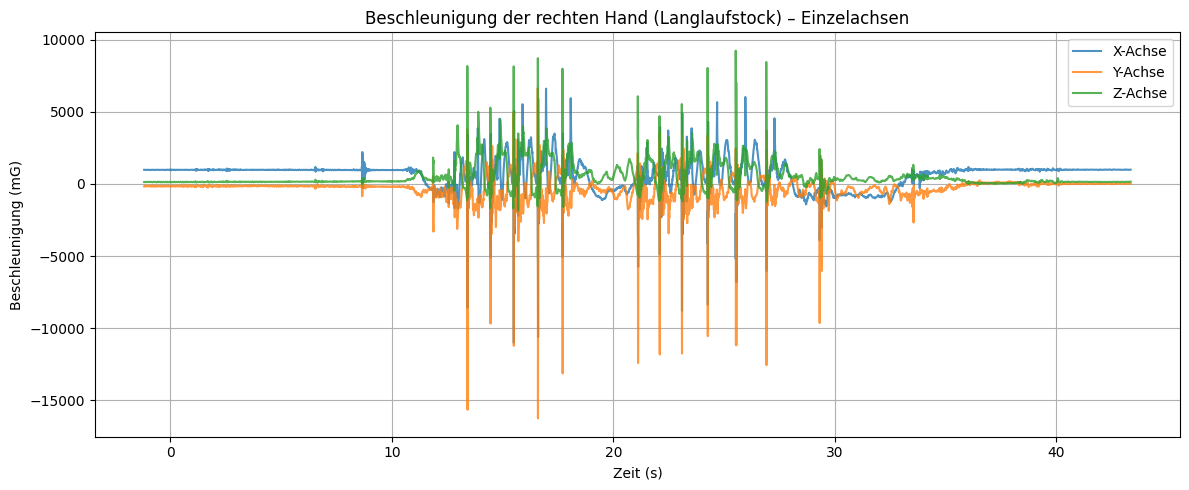

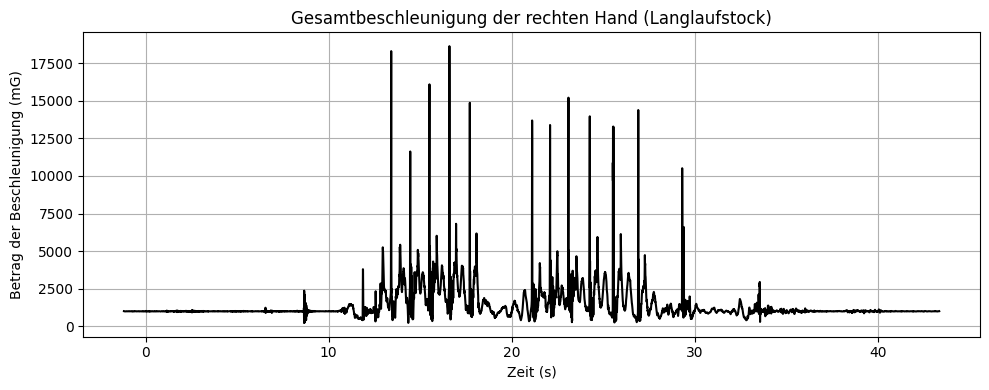

In [60]:
# Plot: Einzelne Achsen der Beschleunigung
plt.figure(figsize=(12, 5))
plt.plot(df["time"], df["RT Hand Accel Sensor X (mG)"], label="X-Achse", alpha=0.8)
plt.plot(df["time"], df["RT Hand Accel Sensor Y (mG)"], label="Y-Achse", alpha=0.8)
plt.plot(df["time"], df["RT Hand Accel Sensor Z (mG)"], label="Z-Achse", alpha=0.8)
plt.title("Beschleunigung der rechten Hand (Langlaufstock) – Einzelachsen")
plt.xlabel("Zeit (s)")
plt.ylabel("Beschleunigung (mG)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Betrag der Beschleunigung berechnen
df["accel_magnitude"] = np.sqrt(
    df["RT Hand Accel Sensor X (mG)"]**2 +
    df["RT Hand Accel Sensor Y (mG)"]**2 +
    df["RT Hand Accel Sensor Z (mG)"]**2
)

# Plot: Gesamtbeschleunigung
plt.figure(figsize=(10, 4))
plt.plot(df["time"], df["accel_magnitude"], color="black")
plt.title("Gesamtbeschleunigung der rechten Hand (Langlaufstock)")
plt.xlabel("Zeit (s)")
plt.ylabel("Betrag der Beschleunigung (mG)")
plt.grid(True)
plt.tight_layout()
plt.show()

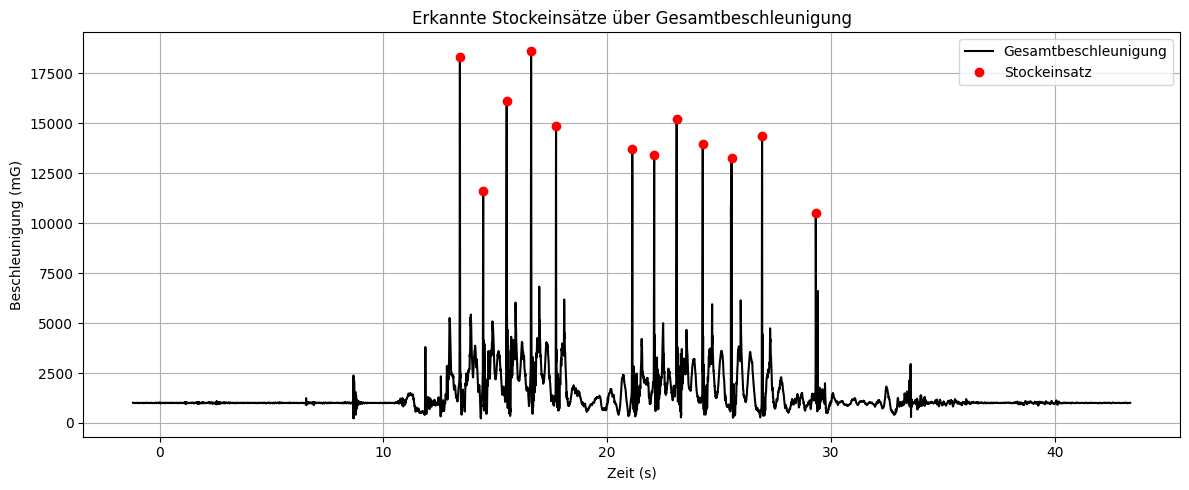

In [61]:
# Peaks (Stockeinsätze) erkennen
peaks, _ = find_peaks(df["accel_magnitude"], height=7000, distance=20)

# Plot mit Markierungen
plt.figure(figsize=(12, 5))
plt.plot(df["time"], df["accel_magnitude"], label="Gesamtbeschleunigung", color="black")
plt.plot(df["time"].iloc[peaks], df["accel_magnitude"].iloc[peaks], "ro", label="Stockeinsatz")
plt.title("Erkannte Stockeinsätze über Gesamtbeschleunigung")
plt.xlabel("Zeit (s)")
plt.ylabel("Beschleunigung (mG)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

    Index  Zeit (s)  Δt zum nächsten Einschlag (s)
0    2921    13.420                          1.040
1    3129    14.460                          1.050
2    3339    15.510                          1.090
3    3557    16.600                          1.115
4    3780    17.715                          3.405
5    4461    21.120                          0.980
6    4657    22.100                          1.005
7    4858    23.105                          1.165
8    5091    24.270                          1.290
9    5349    25.560                          1.360
10   5621    26.920                          2.400
11   6101    29.320                            NaN
Mittelwert der Zeitabstände: 1.445 Sekunden
Standardabweichung der Zeitabstände: 0.728 Sekunden
Schübe pro Minute: 16.16


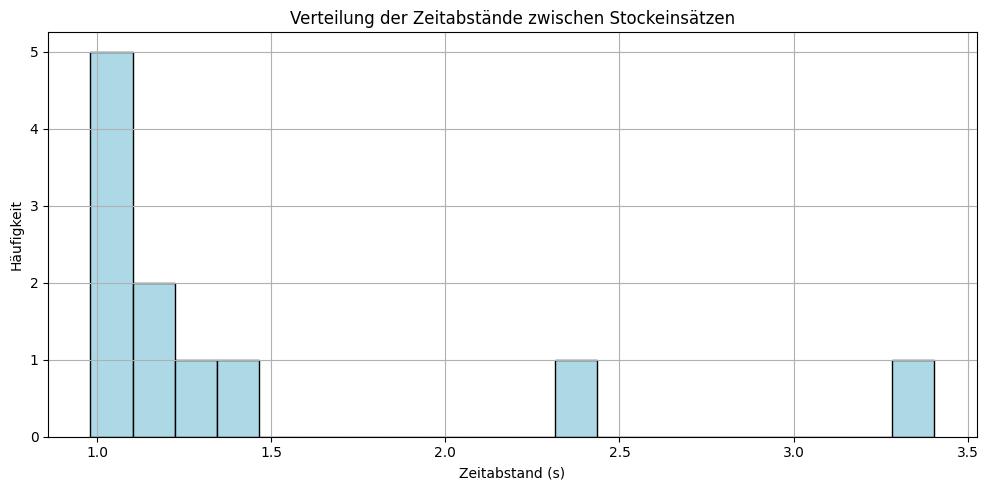

In [62]:
# Zeitpunkte der Einschläge
peak_times = df["time"].iloc[peaks].values

# Zeitabstände zwischen den Einschlägen berechnen
time_differences = np.diff(peak_times)

# Tabelle erstellen
impact_df = pd.DataFrame({
    "Index": peaks,
    "Zeit (s)": peak_times
})

# Zeitabstände als eigene Spalte (vorne bleibt NaN)
impact_df["Δt zum nächsten Einschlag (s)"] = np.append(time_differences, np.nan)

# Ausgabe
print(impact_df)

# Statistik berechnen
mean_dt = np.mean(time_differences)
std_dt = np.std(time_differences)

# Schübe pro Minute berechnen
# Anzahl der Einschläge / Zeitspanne in Minuten
total_time = df["time"].iloc[-1] - df["time"].iloc[0]
shoves_per_minute = len(peaks) / (total_time / 60)

# Ausgabe der Berechnungen
print(f"Mittelwert der Zeitabstände: {mean_dt:.3f} Sekunden")
print(f"Standardabweichung der Zeitabstände: {std_dt:.3f} Sekunden")
print(f"Schübe pro Minute: {shoves_per_minute:.2f}")


# Plot der Verteilung der Zeitabstände (Histogramm)
plt.figure(figsize=(10, 5))
plt.hist(time_differences, bins=20, edgecolor="black", color="lightblue")
plt.title("Verteilung der Zeitabstände zwischen Stockeinsätzen")
plt.xlabel("Zeitabstand (s)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.tight_layout()
plt.show()


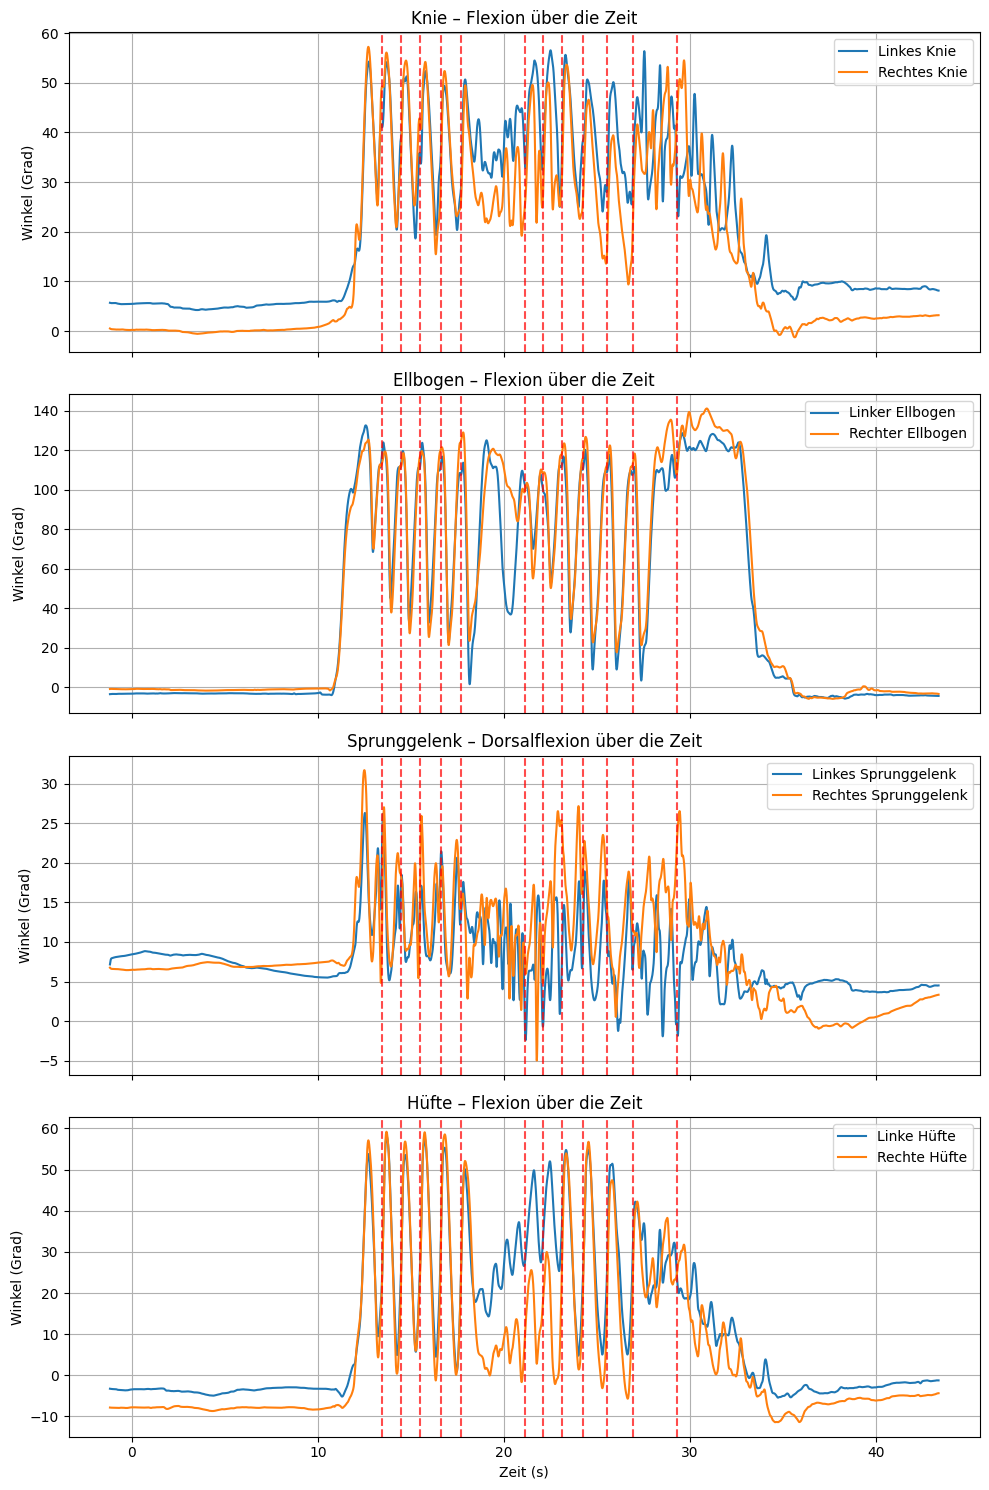

In [63]:
# Relevante Spalten für Hüfte, Knie, Ellbogen und Sprunggelenk (links und rechts)
winkel_spalten = [
    'LT Hip Flexion (deg)', 'RT Hip Flexion (deg)',
    'LT Knee Flexion (deg)', 'RT Knee Flexion (deg)',
    'LT Elbow Flexion (deg)', 'RT Elbow Flexion (deg)',
    'LT Ankle Dorsiflexion (deg)', 'RT Ankle Dorsiflexion (deg)',
]

# Sicherstellen, dass nur diese Spalten extrahiert werden
winkel_df = df[winkel_spalten]

# Subplots erstellen
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Plot für Knie
axes[0].plot(df["time"], winkel_df['LT Knee Flexion (deg)'], label='Linkes Knie')
axes[0].plot(df["time"], winkel_df['RT Knee Flexion (deg)'], label='Rechtes Knie')
axes[0].set_title('Knie – Flexion über die Zeit')
axes[0].set_ylabel('Winkel (Grad)')
axes[0].legend()
axes[0].grid()

for peak_time in peak_times:
    axes[0].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7, label='Einschlagzeitpunkt')

# Plot für Ellbogen
axes[1].plot(df["time"], winkel_df['LT Elbow Flexion (deg)'], label='Linker Ellbogen')
axes[1].plot(df["time"], winkel_df['RT Elbow Flexion (deg)'], label='Rechter Ellbogen')
axes[1].set_title('Ellbogen – Flexion über die Zeit')
axes[1].set_ylabel('Winkel (Grad)')
axes[1].legend()
axes[1].grid()

for peak_time in peak_times:
    axes[1].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7, label='Einschlagzeitpunkt')


# Plot für Sprunggelenk
axes[2].plot(df["time"], winkel_df['LT Ankle Dorsiflexion (deg)'], label='Linkes Sprunggelenk')
axes[2].plot(df["time"], winkel_df['RT Ankle Dorsiflexion (deg)'], label='Rechtes Sprunggelenk')
axes[2].set_title('Sprunggelenk – Dorsalflexion über die Zeit')
axes[2].set_ylabel('Winkel (Grad)')
axes[2].legend()
axes[2].grid()

for peak_time in peak_times:
    axes[2].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7, label='Einschlagzeitpunkt')

# Plot für Hüfte
axes[3].plot(df["time"], winkel_df['LT Hip Flexion (deg)'], label='Linke Hüfte')
axes[3].plot(df["time"], winkel_df['RT Hip Flexion (deg)'], label='Rechte Hüfte')
axes[3].set_title('Hüfte – Flexion über die Zeit')
axes[3].set_xlabel('Zeit (s)')
axes[3].set_ylabel('Winkel (Grad)')
axes[3].legend()
axes[3].grid()

for peak_time in peak_times:
    axes[3].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7, label='Einschlagzeitpunkt')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

In [64]:
# Liste für die maximalen und minimalen Winkel
max_min_angles_rom = []

# Für jedes Intervall zwischen den Einschlägen die Gelenkwinkel berechnen
for i in range(len(peaks)-1):
    start_idx = peaks[i]
    end_idx = peaks[i+1]
    
    # Subset für das Intervall zwischen zwei Einschlägen
    interval_df = df.iloc[start_idx:end_idx]
    
    # Max und Min Werte für Knie, Hüfte und Ellbogen in diesem Intervall
    knee_left_min = interval_df["LT Knee Flexion (deg)"].min()
    knee_left_max = interval_df["LT Knee Flexion (deg)"].max()
    knee_right_min = interval_df["RT Knee Flexion (deg)"].min()
    knee_right_max = interval_df["RT Knee Flexion (deg)"].max()
    
    hip_left_min = interval_df["LT Hip Flexion (deg)"].min()
    hip_left_max = interval_df["LT Hip Flexion (deg)"].max()
    hip_right_min = interval_df["RT Hip Flexion (deg)"].min()
    hip_right_max = interval_df["RT Hip Flexion (deg)"].max()
    
    elbow_left_min = interval_df["LT Elbow Flexion (deg)"].min()
    elbow_left_max = interval_df["LT Elbow Flexion (deg)"].max()
    elbow_right_min = interval_df["RT Elbow Flexion (deg)"].min()
    elbow_right_max = interval_df["RT Elbow Flexion (deg)"].max()

   
    ankle_left_min = interval_df["LT Ankle Dorsiflexion (deg)"].min()
    ankle_left_max = interval_df["LT Ankle Dorsiflexion (deg)"].max()
    ankle_right_min = interval_df["RT Ankle Dorsiflexion (deg)"].min()
    ankle_right_max = interval_df["RT Ankle Dorsiflexion (deg)"].max()

    
    # ROM für jedes Gelenk
    knee_left_rom = knee_left_max - knee_left_min
    knee_right_rom = knee_right_max - knee_right_min
    hip_left_rom = hip_left_max - hip_left_min
    hip_right_rom = hip_right_max - hip_right_min
    elbow_left_rom = elbow_left_max - elbow_left_min
    elbow_right_rom = elbow_right_max - elbow_right_min
    ankle_left_rom = ankle_left_max - ankle_left_min
    ankle_right_rom = ankle_right_max - ankle_right_min
    
    # Max/Min Werte und ROM als Liste für jedes Intervall
    max_min_angles_rom.append({
        "Knee Left Min": knee_left_min, "Knee Left Max": knee_left_max, "Knee Left ROM": knee_left_rom,
        "Knee Right Min": knee_right_min, "Knee Right Max": knee_right_max, "Knee Right ROM": knee_right_rom,
        "Hip Left Min": hip_left_min, "Hip Left Max": hip_left_max, "Hip Left ROM": hip_left_rom,
        "Hip Right Min": hip_right_min, "Hip Right Max": hip_right_max, "Hip Right ROM": hip_right_rom,
        "Elbow Left Min": elbow_left_min, "Elbow Left Max": elbow_left_max, "Elbow Left ROM": elbow_left_rom,
        "Elbow Right Min": elbow_right_min, "Elbow Right Max": elbow_right_max, "Elbow Right ROM": elbow_right_rom,
        "Ankle Left Min": ankle_left_min, "Ankle Left Max": ankle_left_max, "Ankle Left ROM": ankle_left_rom,
        "Ankle Right Min": ankle_right_min, "Ankle Right Max": ankle_right_max, "Ankle Right ROM": ankle_right_rom,
    })

# Neues DataFrame mit den max/min Werten und ROM
max_min_rom_df = pd.DataFrame(max_min_angles_rom)

# An das impact_df anfügen
impact_df = pd.concat([impact_df, max_min_rom_df], axis=1)


# Ausgabe des erweiterten impact_df
print(impact_df)


    Index  Zeit (s)  Δt zum nächsten Einschlag (s)  Knee Left Min  \
0    2921    13.420                          1.040      20.423632   
1    3129    14.460                          1.050      18.647004   
2    3339    15.510                          1.090      19.353175   
3    3557    16.600                          1.115      20.362329   
4    3780    17.715                          3.405      30.874877   
5    4461    21.120                          0.980      32.504341   
6    4657    22.100                          1.005      25.018862   
7    4858    23.105                          1.165      24.947762   
8    5091    24.270                          1.290      24.071260   
9    5349    25.560                          1.360      25.512591   
10   5621    26.920                          2.400      26.113198   
11   6101    29.320                            NaN            NaN   

    Knee Left Max  Knee Left ROM  Knee Right Min  Knee Right Max  \
0       54.160168      33.736536  

In [65]:
# Mittelwerte und Standardabweichungen für alle numerischen Spalten berechnen (ohne die ersten beiden Spalten)
numerische_spalten = impact_df.columns[2:]  # Spalten ab der dritten Spalte
durchschnittswerte = impact_df[numerische_spalten].mean()
standardabweichungen = impact_df[numerische_spalten].std()

# Ergebnisse in einem neuen DataFrame speichern
statistik_df = pd.DataFrame({
    "Spalte": numerische_spalten,
    "Mittelwert": durchschnittswerte.values,
    "Standardabweichung": standardabweichungen.values
})

# Ausgabe des neuen DataFrames
print(statistik_df)

                           Spalte  Mittelwert  Standardabweichung
0   Δt zum nächsten Einschlag (s)    1.445455            0.763418
1                   Knee Left Min   24.348094            4.507998
2                   Knee Left Max   52.881967            2.637491
3                   Knee Left ROM   28.533873            4.679862
4                  Knee Right Min   19.629572            4.920689
5                  Knee Right Max   50.829763            4.690620
6                  Knee Right ROM   31.200190            3.653331
7                    Hip Left Min   10.473584            9.145845
8                    Hip Left Max   52.704502            4.420135
9                    Hip Left ROM   42.230918           12.333855
10                  Hip Right Min    1.216647            5.945718
11                  Hip Right Max   49.240603           11.876076
12                  Hip Right ROM   48.023957           14.121760
13                 Elbow Left Min   27.920072           21.841781
14        

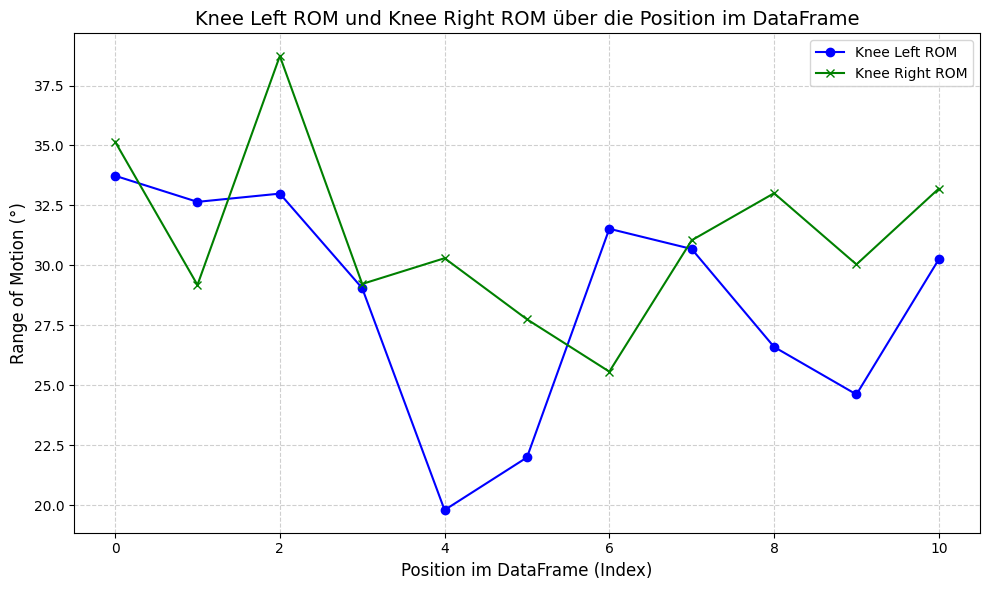

In [66]:
# Plot: Knee Left ROM und Knee Right ROM über die Position im DataFrame
plt.figure(figsize=(10, 6))
plt.plot(impact_df.index, impact_df["Knee Left ROM"], label="Knee Left ROM", color="blue", marker="o")
plt.plot(impact_df.index, impact_df["Knee Right ROM"], label="Knee Right ROM", color="green", marker="x")

# Achsentitel und Plot-Titel hinzufügen
plt.title("Knee Left ROM und Knee Right ROM über die Position im DataFrame", fontsize=14)
plt.xlabel("Position im DataFrame (Index)", fontsize=12)
plt.ylabel("Range of Motion (°)", fontsize=12)

# Legende und Gitter hinzufügen
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Plot anzeigen
plt.tight_layout()
plt.show()


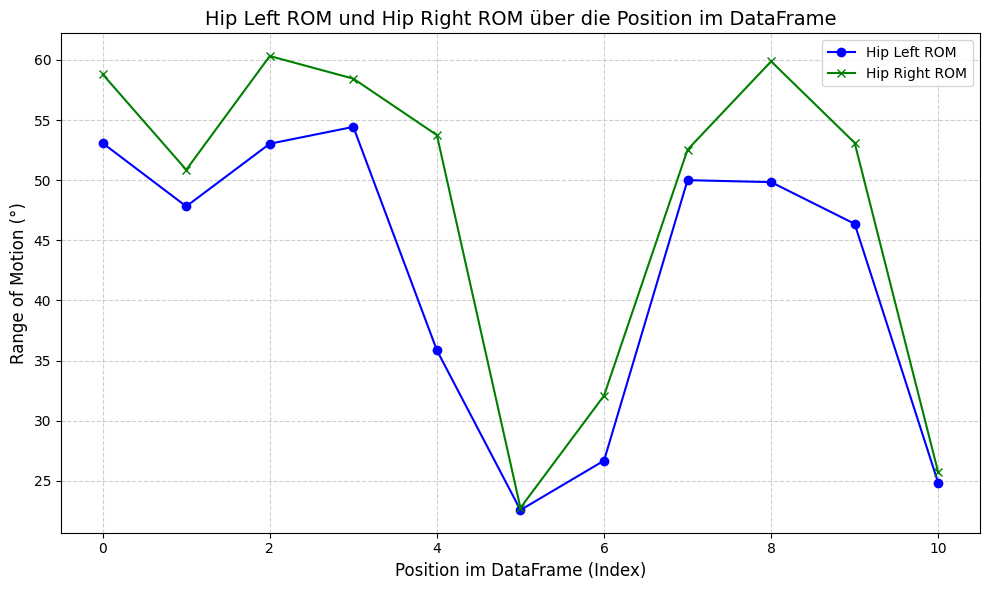

In [67]:
# Plot: Hip Left ROM und Hip Right ROM über die Position im DataFrame
plt.figure(figsize=(10, 6))
plt.plot(impact_df.index, impact_df["Hip Left ROM"], label="Hip Left ROM", color="blue", marker="o")
plt.plot(impact_df.index, impact_df["Hip Right ROM"], label="Hip Right ROM", color="green", marker="x")

# Achsentitel und Plot-Titel hinzufügen
plt.title("Hip Left ROM und Hip Right ROM über die Position im DataFrame", fontsize=14)
plt.xlabel("Position im DataFrame (Index)", fontsize=12)
plt.ylabel("Range of Motion (°)", fontsize=12)

# Legende und Gitter hinzufügen
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Plot anzeigen
plt.tight_layout()
plt.show()

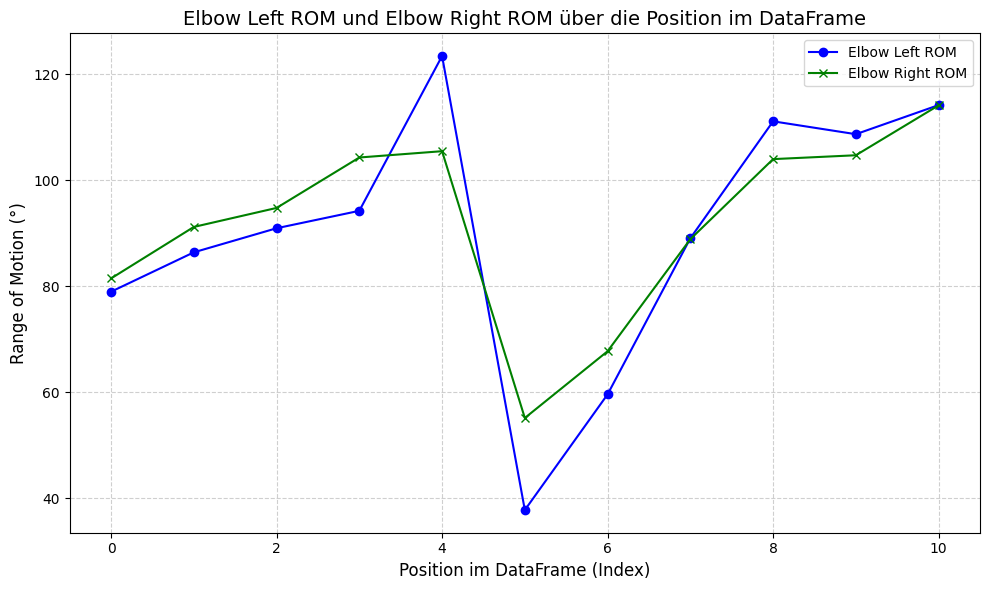

In [68]:
# Plot: Elbow Left ROM und Elbow Right ROM über die Position im DataFrame
plt.figure(figsize=(10, 6))
plt.plot(impact_df.index, impact_df["Elbow Left ROM"], label="Elbow Left ROM", color="blue", marker="o")
plt.plot(impact_df.index, impact_df["Elbow Right ROM"], label="Elbow Right ROM", color="green", marker="x")

# Achsentitel und Plot-Titel hinzufügen
plt.title("Elbow Left ROM und Elbow Right ROM über die Position im DataFrame", fontsize=14)
plt.xlabel("Position im DataFrame (Index)", fontsize=12)
plt.ylabel("Range of Motion (°)", fontsize=12)

# Legende und Gitter hinzufügen
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Plot anzeigen
plt.tight_layout()
plt.show()

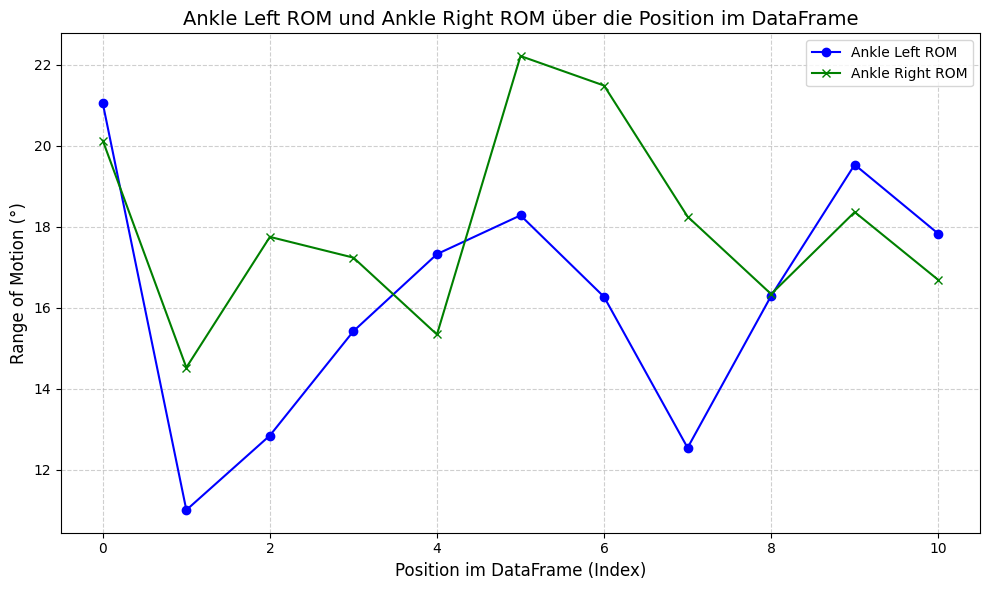

In [71]:
# Plot: Ankle Left ROM und Ankle Right ROM über die Position im DataFrame
plt.figure(figsize=(10, 6))     
plt.plot(impact_df.index, impact_df["Ankle Left ROM"], label="Ankle Left ROM", color="blue", marker="o")
plt.plot(impact_df.index, impact_df["Ankle Right ROM"], label="Ankle Right ROM", color="green", marker="x")

# Achsentitel und Plot-Titel hinzufügen
plt.title("Ankle Left ROM und Ankle Right ROM über die Position im DataFrame", fontsize=14)
plt.xlabel("Position im DataFrame (Index)", fontsize=12)
plt.ylabel("Range of Motion (°)", fontsize=12)

# Legende und Gitter hinzufügen
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Plot anzeigen
plt.tight_layout()
plt.show()

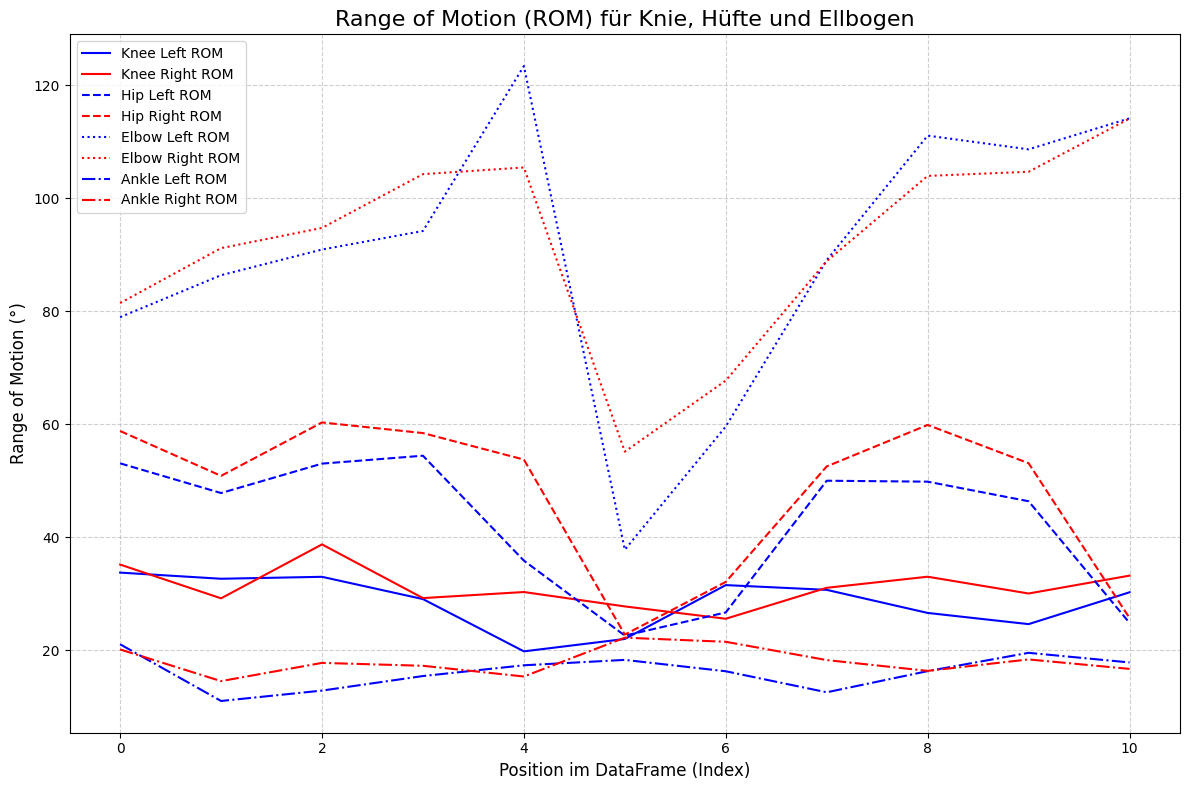

In [72]:
# Plot: Alle ROM-Werte in einem Plot
plt.figure(figsize=(12, 8))

# Knie
plt.plot(impact_df.index, impact_df["Knee Left ROM"], label="Knee Left ROM", color="blue", linestyle="-")
plt.plot(impact_df.index, impact_df["Knee Right ROM"], label="Knee Right ROM", color="red", linestyle="-")

# Hüfte
plt.plot(impact_df.index, impact_df["Hip Left ROM"], label="Hip Left ROM", color="blue", linestyle="--")
plt.plot(impact_df.index, impact_df["Hip Right ROM"], label="Hip Right ROM", color="red", linestyle="--")

# Ellbogen
plt.plot(impact_df.index, impact_df["Elbow Left ROM"], label="Elbow Left ROM", color="blue", linestyle=":")
plt.plot(impact_df.index, impact_df["Elbow Right ROM"], label="Elbow Right ROM", color="red", linestyle=":")

# Sprunggelenk
plt.plot(impact_df.index, impact_df["Ankle Left ROM"], label="Ankle Left ROM", color="blue", linestyle="-.")
plt.plot(impact_df.index, impact_df["Ankle Right ROM"], label="Ankle Right ROM", color="red", linestyle="-.")

# Achsentitel und Plot-Titel hinzufügen
plt.title("Range of Motion (ROM) für Knie, Hüfte und Ellbogen", fontsize=16)
plt.xlabel("Position im DataFrame (Index)", fontsize=12)
plt.ylabel("Range of Motion (°)", fontsize=12)

# Legende und Gitter hinzufügen
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Plot anzeigen
plt.tight_layout()
plt.show()

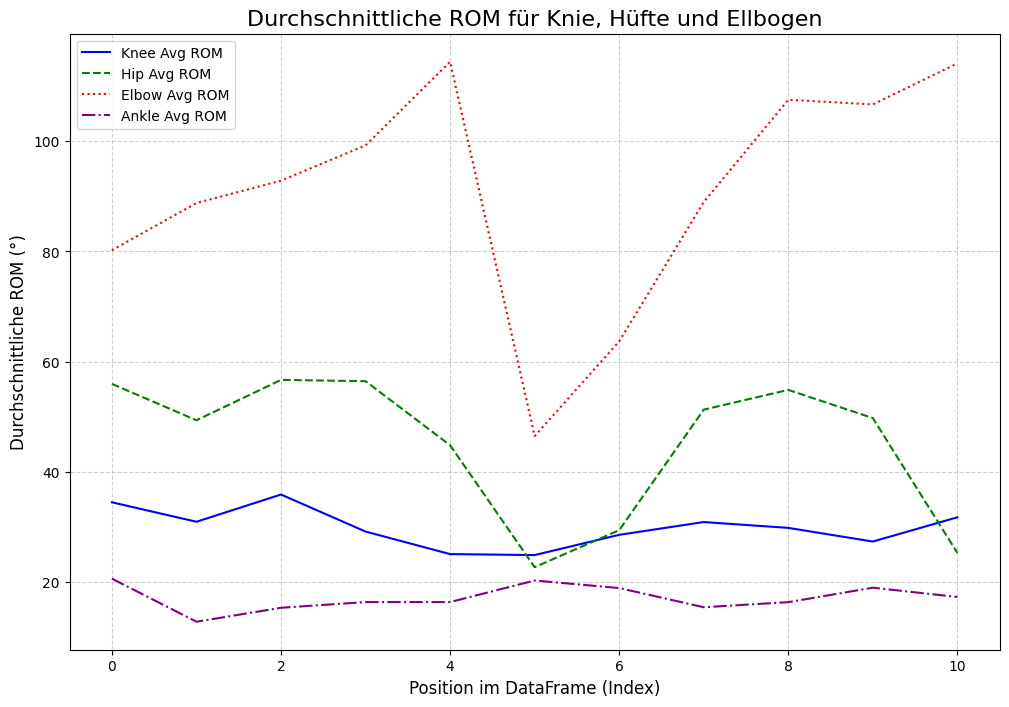

In [73]:
# Durchschnittswerte für Knie, Hüfte und Ellbogen berechnen
impact_df["Knee Avg ROM"] = (impact_df["Knee Left ROM"] + impact_df["Knee Right ROM"]) / 2
impact_df["Hip Avg ROM"] = (impact_df["Hip Left ROM"] + impact_df["Hip Right ROM"]) / 2
impact_df["Elbow Avg ROM"] = (impact_df["Elbow Left ROM"] + impact_df["Elbow Right ROM"]) / 2
impact_df["Ankle Avg ROM"] = (impact_df["Ankle Left ROM"] + impact_df["Ankle Right ROM"]) / 2

# Plot: Durchschnittswerte über den Indexverlauf
plt.figure(figsize=(12, 8))

# Knie
plt.plot(impact_df.index, impact_df["Knee Avg ROM"], label="Knee Avg ROM", color="blue", linestyle="-")

# Hüfte
plt.plot(impact_df.index, impact_df["Hip Avg ROM"], label="Hip Avg ROM", color="green", linestyle="--")

# Ellbogen
plt.plot(impact_df.index, impact_df["Elbow Avg ROM"], label="Elbow Avg ROM", color="red", linestyle=":")

# Sprunggelenk
plt.plot(impact_df.index, impact_df["Ankle Avg ROM"], label="Ankle Avg ROM", color="purple", linestyle="-.")

# Achsentitel und Plot-Titel hinzufügen
plt.title("Durchschnittliche ROM für Knie, Hüfte und Ellbogen", fontsize=16)
plt.xlabel("Position im DataFrame (Index)", fontsize=12)
plt.ylabel("Durchschnittliche ROM (°)", fontsize=12)

# Legende und Gitter hinzufügen
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)


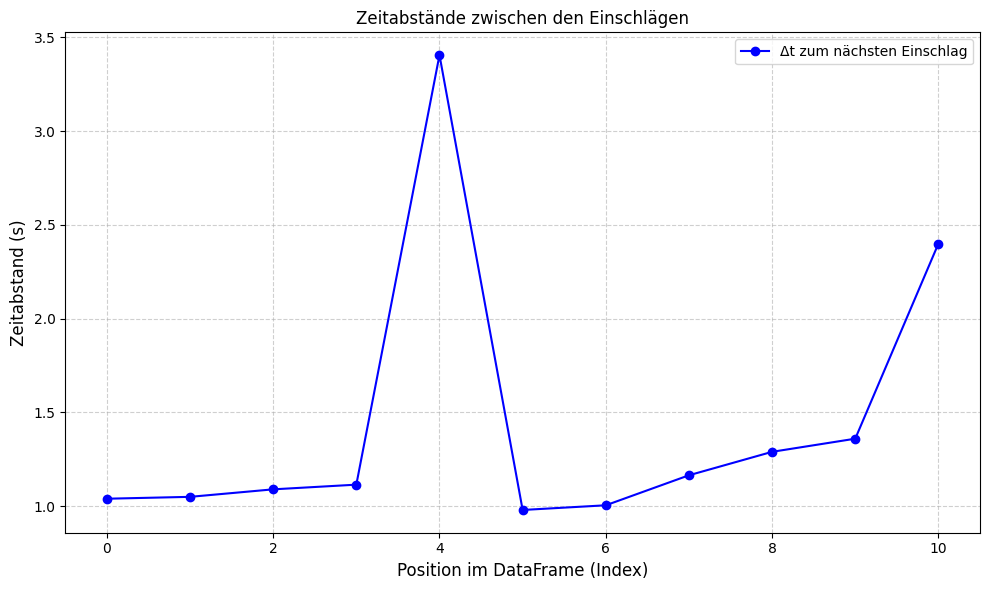

In [74]:
# plot delta t bis zum nächsten Einschlag
plt.figure(figsize=(10, 6))
plt.plot(impact_df.index, impact_df["Δt zum nächsten Einschlag (s)"], label="Δt zum nächsten Einschlag", color="blue", marker="o")
plt.title("Zeitabstände zwischen den Einschlägen")
plt.xlabel("Position im DataFrame (Index)", fontsize=12)
plt.ylabel("Zeitabstand (s)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()